In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import seaborn as sns
import sys

In [2]:
class_votes = [
    "seizure_vote",
    "lpd_vote",
    "gpd_vote",
    "lrda_vote",
    "grda_vote",
    "other_vote",
]

In [3]:
sys.path.insert(0, "C:/Users/Amy/Desktop/Green_Git/eegClassification/utils")
from utils import egg_spec_augmentation, get_data_info

In [4]:

path_out = "C:/Users/Amy/Desktop/Green_Git/eegClassification/models/test_1/"

In [5]:
path_df = "C:\\Users\\Amy\\Desktop\\Green_Git\\eegClassification\\sample_data\\"
df = pd.read_csv(path_df + f"train.csv")

df["total_votes"] = df[
    ["seizure_vote", "lpd_vote", "gpd_vote", "lrda_vote", "grda_vote", "other_vote"]
].sum(axis=1)

with open(path_out + "split.json", "r") as f:
    split = json.load(f)
train_p = np.array(split["train"])
test_p = np.array(split["test"])
print("Loaded train/test split")


Loaded train/test split


In [6]:
min_votes = 0

In [7]:
df_test = df[df["patient_id"].isin(test_p)]
split = int(0.8 * len(train_p))
train_p, valid_p = train_p[:split], train_p[split:]
df_train = df[df["patient_id"].isin(train_p)]
df_train = df_train[df_train["total_votes"] >= min_votes]
df_valid = df[df["patient_id"].isin(valid_p)]

In [8]:
info_train = get_data_info(df_train, "eeg_spec")
info_train_aug = egg_spec_augmentation(info_train)

In [9]:
class_freq = [0]*6
for key in info_train_aug.keys():
    idx = np.argmax(info_train_aug[key]['votes'])
    class_freq[idx] += 1

In [10]:
class_freq

[22806, 12775, 11955, 13409, 13616, 14929]

In [11]:
class_prob = class_freq#/np.sum(class_freq)
class_prob = dict(zip(class_votes, class_prob))
# convert to pandas.core.series.Series
class_prob = pd.Series(class_prob)

In [12]:
class_prob

seizure_vote    22806
lpd_vote        12775
gpd_vote        11955
lrda_vote       13409
grda_vote       13616
other_vote      14929
dtype: int64

In [13]:
df[class_votes].idxmax(axis=1).value_counts(normalize=True)

seizure_vote    0.196002
grda_vote       0.176601
other_vote      0.176105
gpd_vote        0.156386
lrda_vote       0.155805
lpd_vote        0.139101
Name: proportion, dtype: float64

In [14]:
len(df_train), len(df_valid), len(df_test)

(68471, 16278, 22051)

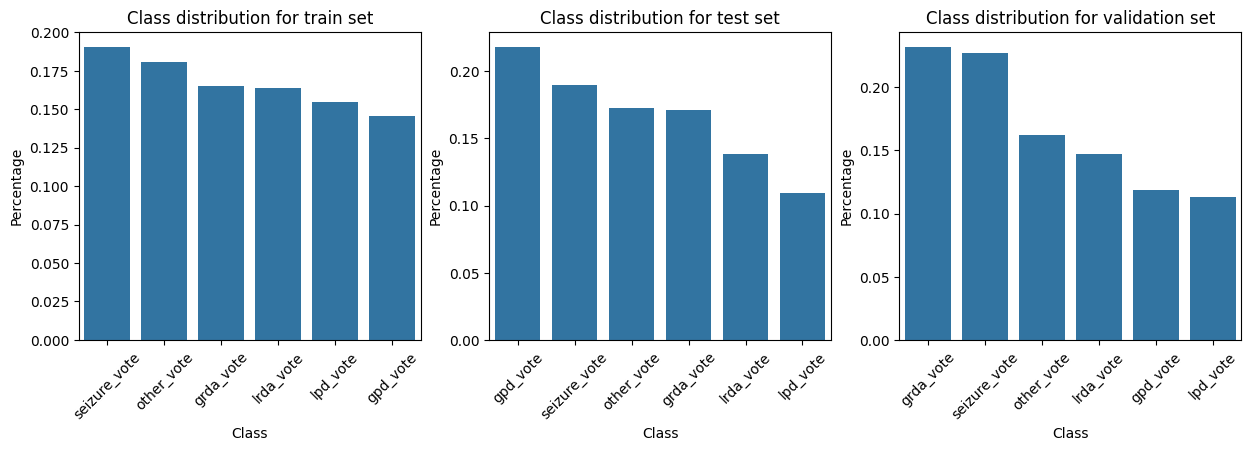

In [15]:


fig, ax = plt.subplots(1, 3, figsize=(15, 4))
for i, df in enumerate([df_train, df_test, df_valid]):
    sns.barplot(data=df[class_votes].idxmax(axis=1).value_counts(normalize=True), ax=ax[i])
    ax[i].set_title(f'Class distribution for {["train", "test", "validation"][i]} set')
    ax[i].set_xlabel('Class')
    ax[i].set_ylabel('Percentage')
    ax[i].set_xticks(range(6))
    # rotate x labels
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(45)

In [16]:
data = df_train[class_votes].idxmax(axis=1).value_counts()

In [17]:
# merge data and class_prob
data = pd.concat([data, class_prob], axis=1)

In [18]:
# rename columns
data.columns = ['base', 'augmented']

Text(0.5, 1.0, 'Class distribution for base and augmented data')

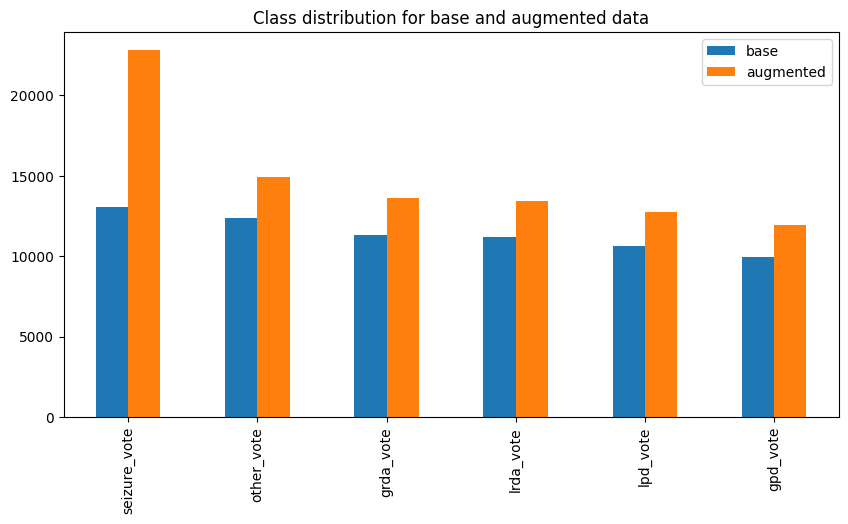

In [19]:
# bar plot
data.plot(kind='bar', figsize=(10, 5))
plt.title('Class distribution for base and augmented data')


<Axes: >

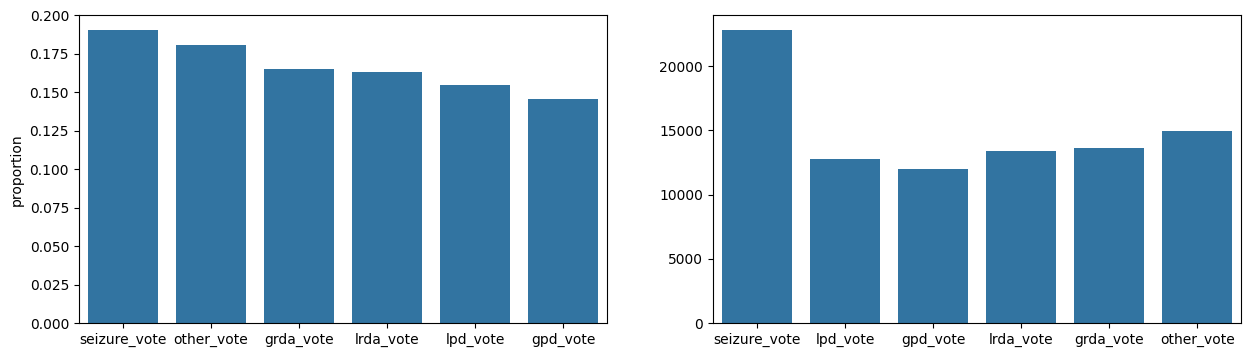

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.barplot(data=df_train[class_votes].idxmax(axis=1).value_counts(normalize=True), ax=ax[0])
sns.barplot(data=class_prob, ax=ax[1])